## Normalize Innovation Sqaured (NIS)
Calculate the NIS for a given model and plot the results with a given chi-squared distribution.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [14]:
# import NIS data to pandas dataframe
cwd = os.getcwd()
NIS_lidar_key = "NIS_lidar_log.txt"
NIS_radar_key = "NIS_radar_log.txt"

NIS_lidar_path = os.path.join(cwd, NIS_lidar_key)
NIS_radar_path = os.path.join(cwd, NIS_radar_key)

df_lidar = pd.read_csv(NIS_lidar_path, names=['NIS_lidar'])
df_radar = pd.read_csv(NIS_radar_path, names=['NIS_radar'])

In [20]:
df_lidar.head()

,NIS_lidar
0,0.646724
1,1.696860
2,0.126030
3,4.242590
4,1.381010


In [26]:
chi_square_df = pd.read_csv(os.path.join(cwd, "chi_square.csv"))
chi_square_df.head()

,DF,0.995,0.975,0.2,0.1,0.05,0.025,0.02,0.01,0.005,0.002,0.001
0,1,0.000039,0.000982,1.642,2.706,3.841,5.024,5.412,6.635,7.879,9.550,10.828
1,2,0.010000,0.050600,3.219,4.605,5.991,7.378,7.824,9.210,10.597,12.429,13.816
2,3,0.071700,0.216000,4.642,6.251,7.815,9.348,9.837,11.345,12.838,14.796,16.266
3,4,0.207000,0.484000,5.989,7.779,9.488,11.143,11.668,13.277,14.860,16.924,18.467
4,5,0.412000,0.831000,7.289,9.236,11.070,12.833,13.388,15.086,16.750,18.907,20.515


In [31]:
#  retrieve the NIS threshold value
degs_of_freedom = 3
df_idx = degs_of_freedom - 1
NIS_threshold = chi_square_df["0.05"][df_idx]

In [35]:
df_lidar['NIS Threshold'] = NIS_threshold
df_radar['NIS Threshold'] = NIS_threshold
df_radar.head()


,NIS_radar,NIS Threshold
0,19.73410,7.815
1,29.85670,7.815
2,1.55684,7.815
3,1.70510,7.815
4,2.11598,7.815


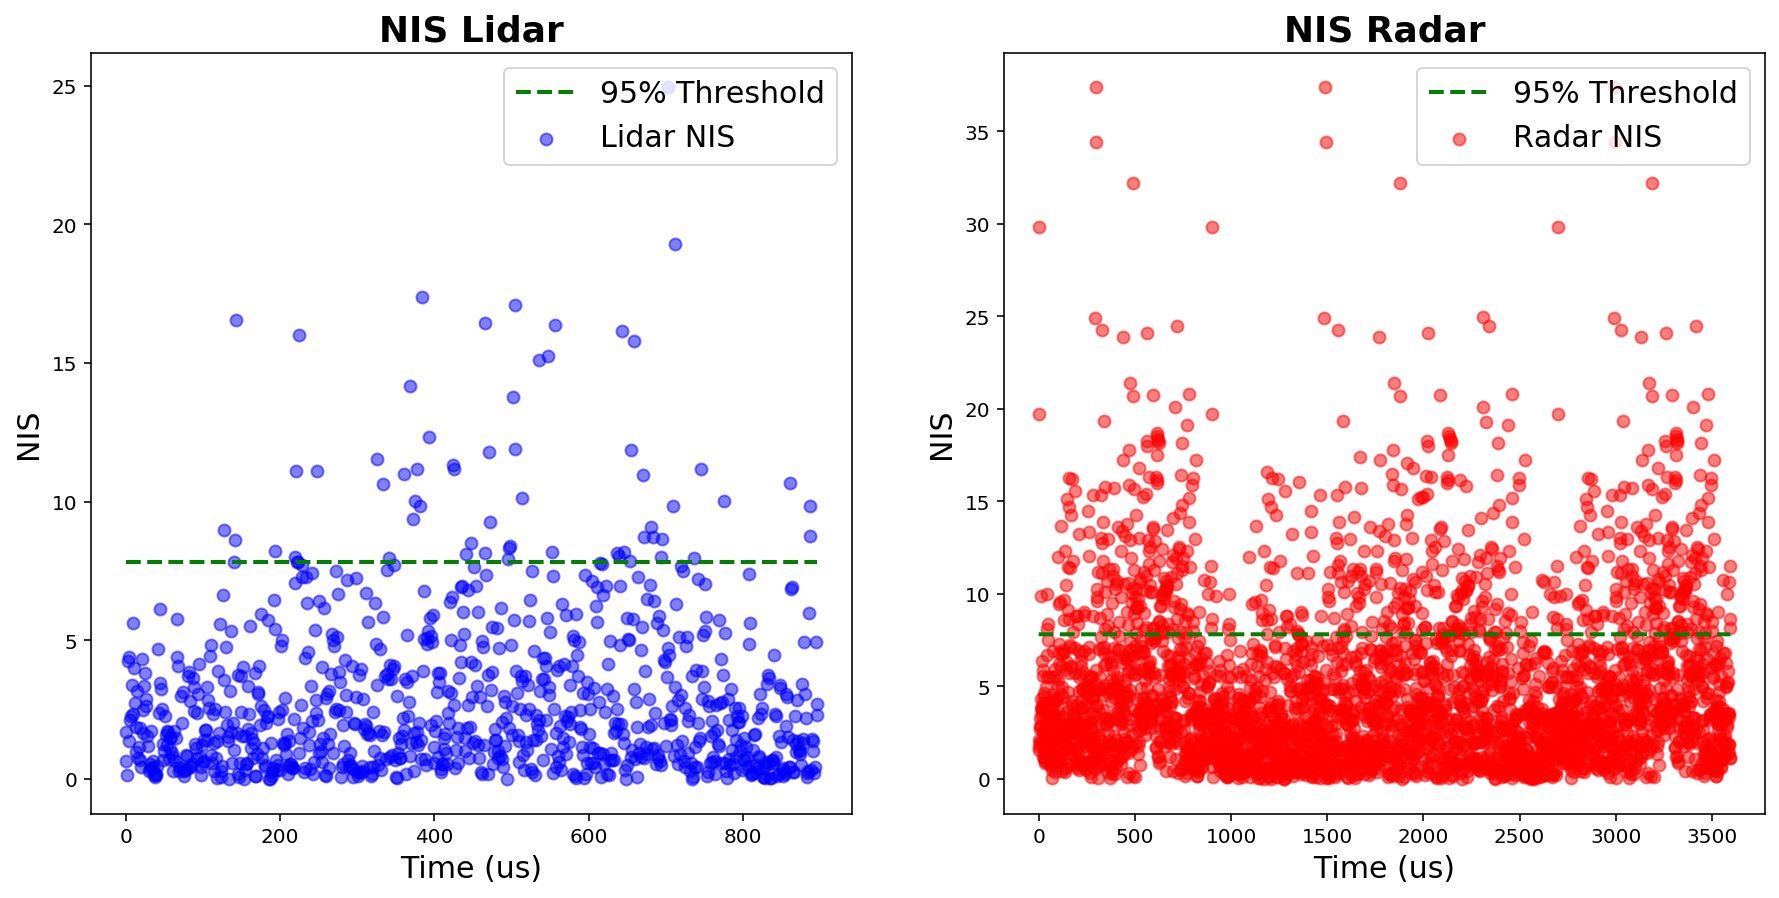

In [48]:
# plot the NIS data 
plt.figure(figsize=(15,7))

# NIS_lidar
plt.subplot(1,2,1)
plt.scatter(df_lidar.index, df_lidar['NIS_lidar'], label='Lidar NIS', alpha=0.5, color='blue')
plt.plot(df_lidar.index, df_lidar['NIS Threshold'], label='95% Threshold', color='green', linestyle='--', linewidth=2)
plt.xlabel('Time (us)', fontsize=15)
plt.ylabel('NIS', fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.title('NIS Lidar', fontsize=18, fontweight='bold')

# NIS_radar
plt.subplot(1,2,2)
plt.scatter(df_radar.index, df_radar['NIS_radar'], label='Radar NIS', alpha=0.5, color='red')
plt.plot(df_radar.index, df_radar['NIS Threshold'], label='95% Threshold', color='green', linestyle='--', linewidth=2)
plt.xlabel('Time (us)', fontsize=15)
plt.ylabel('NIS', fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.title('NIS Radar', fontsize=18, fontweight='bold')

# save plot
project_path = os.path.abspath(os.path.join(cwd, os.pardir))
media_folder = os.path.join(project_path, "media")
plt.savefig(os.path.join(media_folder, "NIS_plot.png"), dpi=100)

plt.show()